https://www.kaggle.com/datasets/mathurinache/world-happiness-report?datasetId=748584&sortBy=voteCount

### 0. Libraries import

In [1]:
import pandas as pd
import numpy as np

# !pip install bubbly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bubbly.bubbly import bubbleplot

import requests
from bs4 import BeautifulSoup
from lxml import html

# Scrapping Gini indexes table from WIkipedia  
https://www.youtube.com/watch?v=lMv7C4dcj3o&ab_channel=PyLenin

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_by_wealth_inequality'
r = requests.get(url)
r

<Response [200]>

In [3]:
bs = BeautifulSoup(r.text,"lxml")

In [4]:
table = bs.select_one('table', class_ = '.wikitable sortable static-row-numbers plainrowheaders srn-white-background jquery-tablesorter')
headers = table.findAll('th')
# headers
# table

In [5]:
titlesRow = []
for i in headers:
    title = i.text
    titlesRow.append(title)
# titlesRow

['Country',
 'Wealth Gini',
 'Population',
 'Nominal GDP',
 'GDP per capita\n',
 '2008',
 '2018',
 '2019',
 '',
 '% of world',
 '(in millions)',
 '% of world\n']

In [6]:
titles = []
titles.append(titlesRow[0])
titles.append(titlesRow[1] + ' ' + titlesRow[5])
titles.append(titlesRow[1] + ' ' + titlesRow[6])
titles.append(titlesRow[1] + ' ' + titlesRow[7])
titles.append(titlesRow[2])
titles.append(titlesRow[2] + ' ' + titlesRow[9])
titles.append(titlesRow[3] + ' ' + titlesRow[10])
titles.append(titlesRow[3] + ' ' + titlesRow[11].replace('\n', ''))
titles.append(titlesRow[4].replace('\n', ''))
# titles

['Country',
 'Wealth Gini 2008',
 'Wealth Gini 2018',
 'Wealth Gini 2019',
 'Population',
 'Population % of world',
 'Nominal GDP (in millions)',
 'Nominal GDP % of world',
 'GDP per capita']

In [7]:
rows = []
data_rows = table.findAll('tr')
for row in data_rows:
    value = row.findAll('td')
    beautifed_value  = [dp.text.strip() for dp in value]
    # print(beautifed_value)
    if len(beautifed_value) == 0:
        continue
    rows.append(beautifed_value)
# rows

[['World',
  '0.804',
  '0.904',
  '0.885',
  '8,038,013,000',
  '100',
  '101,560,901',
  '100',
  '11,258'],
 ['Afghanistan', '—', '—', '0.655', '—', '—', '—', '—', '—'],
 ['Albania',
  '0.642',
  '0.629',
  '0.637',
  '2,882,740',
  '0.036',
  '15,103',
  '0.014',
  '5,239'],
 ['Algeria',
  '0.67',
  '0.758',
  '0.749',
  '42,228,420',
  '0.53',
  '0.55',
  '0',
  '4,115'],
 ['Angola', '—', '—', '0.731', '—', '—', '—', '—', '—'],
 ['Antigua and Barbuda',
  '0.747',
  '0.838',
  '0.823',
  '96,280',
  '0.0012',
  '1,611',
  '0.0015',
  '16,732'],
 ['Argentina\u202f*',
  '0.74',
  '0.792',
  '0.768',
  '44,361,150',
  '0.55',
  '0.58',
  '0',
  '11,719'],
 ['Armenia',
  '0.684',
  '0.645',
  '0.663',
  '2,951,740',
  '0.037',
  '12,433',
  '0.012',
  '4,212'],
 ['Aruba', '—', '—', '0.703', '—', '—', '—', '—', '—'],
 ['Australia',
  '0.622',
  '0.658',
  '0.656',
  '24,898,150',
  '0.31',
  '1,433,904',
  '1.4',
  '57,591'],
 ['Austria',
  '0.646',
  '0.764',
  '0.739',
  '8,891,380',


In [91]:
dfGini = pd.DataFrame(rows, columns=titles)
dfGini = dfGini.stack().str.replace(',','').unstack()
dfGini = dfGini.replace('—', np.NaN)
dfGini.loc[df[C]   Nominal GDP % of world] 
df.loc[df["gender"] == "male", "gender"] = 1
dfGini.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    181 non-null    object
 1   Wealth Gini 2008           139 non-null    object
 2   Wealth Gini 2018           132 non-null    object
 3   Wealth Gini 2019           173 non-null    object
 4   Population                 141 non-null    object
 5   Population % of world      141 non-null    object
 6   Nominal GDP (in millions)  141 non-null    object
 7   Nominal GDP % of world     141 non-null    object
 8   GDP per capita             141 non-null    object
dtypes: object(9)
memory usage: 14.1+ KB


In [99]:

dfGini = dfGini.astype({
    'Wealth Gini 2008' : 'float32',
    'Wealth Gini 2018' : 'float32',
    'Wealth Gini 2019' : 'float32',
    'Population' : 'float32',
    'Population % of world' : 'float32',
    'Nominal GDP (in millions)' : 'float32',
    'GDP per capita' : 'float32'
    })
dfGini.info()
dfGini.to_csv (r'C:\Users\Nadezhda\Desktop\Python\диплом\World Happiness Report up to 2022\dfGini.csv', index= False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    181 non-null    object 
 1   Wealth Gini 2008           139 non-null    float32
 2   Wealth Gini 2018           132 non-null    float32
 3   Wealth Gini 2019           173 non-null    float32
 4   Population                 141 non-null    float32
 5   Population % of world      141 non-null    float32
 6   Nominal GDP (in millions)  141 non-null    float32
 7   Nominal GDP % of world     141 non-null    object 
 8   GDP per capita             141 non-null    float32
dtypes: float32(7), object(2)
memory usage: 9.2+ KB


### 1. Datasets import

In [10]:
place = 'folder'
# place = 'kaggle'

In [11]:
if place == 'folder':
    pathPart = ''
elif place == 'kaggle':
    pathPart = '../input/world-happiness-report/'
else:
    print('Choose a place')

In [12]:
df22 = pd.read_csv(pathPart + '2022.csv')
df22['Year'] = 2022
df22.loc[(df22.Country == 'Belarus*'), 'Country'] = 'Belarus'

In [13]:
df21 = pd.read_csv(pathPart + '2021.csv') #import Dataset
df21['Year'] = 2021
df21['Happiness Rank'] =  range(1, len(df21.index)+1)
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [14]:
df20 = pd.read_csv(pathPart + '2020.csv')
df20['Year'] = 2020
df20['Happiness Rank'] =  range(1, len(df20.index)+1)


In [15]:
df19 = pd.read_csv(pathPart + '2019.csv')
df19['Year'] = 2019

In [16]:
df18 = pd.read_csv(pathPart + '2018.csv') 
df18['Year'] = 2018

In [17]:
df17 = pd.read_csv(pathPart + '2017.csv')
df17['Year'] = 2017

In [18]:
df16 = pd.read_csv(pathPart + '2016.csv')
df16['Year'] = 2016

In [19]:
df15 = pd.read_csv(pathPart + '2015.csv')
df15['Year'] = 2015

In [20]:
sets = [df15, df16, df17, df18, df19, df20, df21, df22] 
for i in sets:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

### 2. Normalization and Merging datasets

To merge data in one data frame we have added column defining year.  
As we can see datasets include different amount of columns and column names are different.  
To merge data in one data frame we have added column defining year.  
To succeed concat  data in one data frame we need to rename columns name to unify them.

In [21]:
df15 = df15.rename(columns = {
    'Family' : 'Social support'})

In [22]:
df16 = df16.rename(columns = {
    'Family' : 'Social support'})

In [23]:
df17 = df17.rename(columns = {
    'Happiness.Rank':'Happiness Rank', 
    'Happiness.Score' : 'Happiness Score', 
    'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 
    'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
    'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 
    'Family' : 'Social support',
    'Dystopia.Residual' : 'Dystopia Residual'})

# ['Health (Life Expectancy)', 'Trust (Government Corruption)'] not in index"

In [24]:
df18 = df18.rename(columns = {
    'Country or region' : 'Country',
    'Overall rank':'Happiness Rank', 
    'Score' : 'Happiness Score', 
    'GDP per capita' : 'Economy (GDP per Capita)', 
    'Healthy life expectancy' : 'Health (Life Expectancy)',
    'Freedom to make life choices' : 'Freedom',
    'Perceptions of corruption' : 'Trust (Government Corruption)'})

In [25]:
df19 = df19.rename(columns = {
    'Country or region' : 'Country',
    'Overall rank':'Happiness Rank', 
    'Score' : 'Happiness Score', 
    'GDP per capita' : 'Economy (GDP per Capita)', 
    'Healthy life expectancy' : 'Health (Life Expectancy)',
    'Freedom to make life choices' : 'Freedom',
    'Perceptions of corruption' : 'Trust (Government Corruption)'})

In [26]:
df20 = df20.rename(columns = {
    'Country name' : 'Country',
    'Ladder score' : 'Happiness Score', 
    # 'Logged GDP per capita' : 'Economy (GDP per Capita)', 
    # 'Healthy life expectancy' : 'Health (Life Expectancy)',
    'Freedom to make life choices' : 'Freedom',
    'Perceptions of corruption' : 'Trust (Government Corruption)'})
df20['Economy (GDP per Capita)'] = df20['Logged GDP per capita'] / 10
df20['Health (Life Expectancy)'] = df20['Healthy life expectancy'] / 100


In [27]:
df21 = df21.rename(columns = {
    'Country name' : 'Country',
    'Ladder score' : 'Happiness Score', 
    # 'Logged GDP per capita' : 'Economy (GDP per Capita)', 
    # 'Healthy life expectancy' : 'Health (Life Expectancy)',
    'Freedom to make life choices' : 'Freedom',
    'Perceptions of corruption' : 'Trust (Government Corruption)'})
df21['Economy (GDP per Capita)'] = df21['Logged GDP per capita'] / 10
df21['Health (Life Expectancy)'] = df21['Healthy life expectancy'] / 100


In [28]:
df22 = df22.rename(columns = {
    'RANK':'Happiness Rank', 
    'Happiness score' : 'Happiness Score', 
    'Explained by: GDP per capita' : 'Economy (GDP per Capita)', 
    'Explained by: Social support' : 'Social support',
    'Explained by: Healthy life expectancy' : 'Health (Life Expectancy)',
    'Explained by: Freedom to make life choices' : 'Freedom',
    'Explained by: Generosity' : 'Generosity',
    'Explained by: Perceptions of corruption' : 'Trust (Government Corruption)'})

In [29]:
df = pd.concat([df15, df16, df17, df18, df19, df20, df21, df22])[[
    'Country', 
    'Happiness Rank',
    'Happiness Score', 
    'Economy (GDP per Capita)',
    'Social support', 
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity', 
    'Year']]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 146
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        1231 non-null   object
 1   Happiness Rank                 1231 non-null   int64 
 2   Happiness Score                1230 non-null   object
 3   Economy (GDP per Capita)       1230 non-null   object
 4   Social support                 1230 non-null   object
 5   Health (Life Expectancy)       1230 non-null   object
 6   Freedom                        1230 non-null   object
 7   Trust (Government Corruption)  1229 non-null   object
 8   Generosity                     1230 non-null   object
 9   Year                           1231 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 105.8+ KB


###  3. Dtype specifying

To make calculations wee need to change some Dtypes.  
Some numeric valuese has ',' separators. PD accept only '.'

In [31]:
df['Happiness Score'] =  df['Happiness Score'].apply(lambda x: str(x).replace(',', '.'))
df['Economy (GDP per Capita)'] =  df['Economy (GDP per Capita)'].apply(lambda x: str(x).replace(',', '.'))
df['Social support'] =  df['Social support'].apply(lambda x: str(x).replace(',', '.'))
df['Health (Life Expectancy)'] =  df['Health (Life Expectancy)'].apply(lambda x: str(x).replace(',', '.'))
df['Freedom'] =  df['Freedom'].apply(lambda x: str(x).replace(',', '.'))
df['Trust (Government Corruption)'] =  df['Trust (Government Corruption)'].apply(lambda x: str(x).replace(',', '.'))
df['Generosity'] =  df['Generosity'].apply(lambda x: str(x).replace(',', '.'))


In [32]:
df = df.astype({
    'Happiness Score' : 'float32',
    'Economy (GDP per Capita)' : 'float32',
    'Social support' : 'float32',
    'Health (Life Expectancy)' : 'float32',
    'Freedom' : 'float32',
    'Trust (Government Corruption)' : 'float32',
    'Generosity' : 'float32'
    })
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 0 to 146
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1231 non-null   object 
 1   Happiness Rank                 1231 non-null   int64  
 2   Happiness Score                1230 non-null   float32
 3   Economy (GDP per Capita)       1230 non-null   float32
 4   Social support                 1230 non-null   float32
 5   Health (Life Expectancy)       1230 non-null   float32
 6   Freedom                        1230 non-null   float32
 7   Trust (Government Corruption)  1229 non-null   float32
 8   Generosity                     1230 non-null   float32
 9   Year                           1231 non-null   int64  
dtypes: float32(7), int64(2), object(1)
memory usage: 72.1+ KB


In [33]:
df.isna().mean().sort_values(ascending=False)

Trust (Government Corruption)    0.001625
Happiness Score                  0.000812
Economy (GDP per Capita)         0.000812
Social support                   0.000812
Health (Life Expectancy)         0.000812
Freedom                          0.000812
Generosity                       0.000812
Country                          0.000000
Happiness Rank                   0.000000
Year                             0.000000
dtype: float64

In [34]:
# df.to_csv (r'C:\Users\Nadezhda\Desktop\Python\диплом\World Happiness Report up to 2022\my_data.csv', index= False, sep='%' )

There are 2 rows with null  
I've checked them into row data.  
They are unimportant for use, so we can drop them .

### 4. Happiness Rank pivot

Color Columns, Rows & Cells of Pandas Dataframe  by fumctions
https://kanoki.org/2019/01/02/pandas-trick-for-the-day-color-code-columns-rows-cells-of-dataframe/

In [35]:
def color_rank(value):
    if value == 1:
        color = 'yellow'
    elif value == 2:
        color = 'silver'
    elif value == 3:
        color = 'moccasin'
    else:
        color = 'default'
    return 'background-color: %s' % color


def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    data = data.astype(float)
    if data.ndim == 1: 
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [36]:
datapivothappiness_rank = df.pivot(index='Country', columns='Year', values=['Happiness Rank'])
datapivothappiness_rank = datapivothappiness_rank.dropna(axis = 0)
datapivothappiness_rank = datapivothappiness_rank.astype('Int32')
# datapivothappiness_rank.info()





### 4.1. The happiest countries

In [37]:
datapivothappiness_rank['AVG'] = datapivothappiness_rank.mean(axis = 1)
datapivothappiness_rank = datapivothappiness_rank.sort_values(by = ['AVG'])
datapivothappiness_rank['Rank'] = range(1, len(datapivothappiness_rank)+1)
datapivothappiness_rank.style\
    .applymap(color_rank, subset = ['Happiness Rank', 'Rank'])\
    .format(precision=2, thousands=".", decimal=",")\
    .apply(lambda x: ['background: blue' if x.name in ['Russia'] 
                              else '' for i in x], 
                   axis=1)


<ins>  Conclusion ** </ins>  
The first 3 places in terms of happiness have been occupied by the following countries since 2015:  
Denmark, Finland, Iceland,Switzerland, Norway.  
Finland on the first place last 5 years.  
Denmark on the 2nd place last 4 years.  
Russia is somewhere between 49 and 80 place and we loose our positions since 2017 every year.

### 4.2. The most unhappy countries

In [38]:
datapivothappiness_rank['AVG'] = datapivothappiness_rank.mean(axis = 1)
datapivothappiness_rank = datapivothappiness_rank.sort_values(by = ['AVG'], ascending = False)
datapivothappiness_rank['Rank'] = range(1, len(datapivothappiness_rank)+1)
datapivothappiness_rank.style\
    .format(precision=2, thousands=".", decimal=",")\
    .apply(lambda x: ['background: blue' if x.name in ['Russia'] 
                              else '' for i in x], 
                   axis=1)\
   .apply(highlight_max)


<ins>  Conclusion ** </ins>  
Afginistan has bee the most unhappy country for 4 previous years (2019-2022).  
The most unhappy coyntry in 2017 and 2018 Tanzania was Tanzania.  
The first place of unhappiness was placed by Togo in 2015-2016.


### 5. Happiness Score pivot

In [39]:
datapivothappiness_score = df.pivot(index='Country', columns='Year', values='Happiness Score')
datapivothappiness_score = datapivothappiness_score.dropna(axis = 0)
datapivothappiness_score['AVG'] = datapivothappiness_score.mean(axis = 1)
datapivothappiness_score = datapivothappiness_score.sort_values(by ='AVG', ascending=False)
datapivothappiness_score.style\
    .apply(highlight_max)\
    .apply(lambda x: ['background: blue' if x.name in ['Russia'] 
                              else '' for i in x], 
                   axis=1)\
    \
    .format(precision=2, thousands=".", decimal=",")\



Year,2015,2016,2017,2018,2019,2020,2021,2022,AVG
Country,,,,,,,,,
Finland,"7,41","7,41","7,47","7,63","7,77","7,81","7,84","7,82","7,65"
Denmark,"7,53","7,53","7,52","7,55","7,60","7,65","7,62","7,64","7,58"
Switzerland,"7,59","7,51","7,49","7,49","7,48","7,56","7,57","7,51","7,52"
Iceland,"7,56","7,50","7,50","7,49","7,49","7,50","7,55","7,56","7,52"
Norway,"7,52","7,50","7,54","7,59","7,55","7,49","7,39","7,36","7,49"
Netherlands,"7,38","7,34","7,38","7,44","7,49","7,45","7,46","7,41","7,42"
Sweden,"7,36","7,29","7,28","7,31","7,34","7,35","7,36","7,38","7,34"
New Zealand,"7,29","7,33","7,31","7,32","7,31","7,30","7,28","7,20","7,29"
Canada,"7,43","7,40","7,32","7,33","7,28","7,23","7,10","7,03","7,26"


In [40]:
### 5.1. The happiest countries

### 6. Where is Russia?

In [41]:
short_list = ['Russia', 'Belarus', 'Ukraine', 'Kazakhstan', 'Uzbekistan', 'Finland']
# short_list = ['Russia']

In [42]:
datapivothappiness_score[datapivothappiness_score.index.isin (short_list)].style\
    .background_gradient(cmap='Greens')\
    .format(precision=1, thousands=".", decimal=",")


Year,2015,2016,2017,2018,2019,2020,2021,2022,AVG
Country,,,,,,,,,
Finland,"7,4","7,4","7,5","7,6","7,8","7,8","7,8","7,8","7,6"
Uzbekistan,"6,0","6,0","6,0","6,1","6,2","6,3","6,2","6,1","6,1"
Kazakhstan,"5,9","5,9","5,8","5,8","5,8","6,1","6,2","6,2","6,0"
Russia,"5,7","5,9","6,0","5,8","5,6","5,5","5,5","5,5","5,7"
Belarus,"5,8","5,8","5,6","5,5","5,3","5,5","5,5","5,8","5,6"
Ukraine,"4,7","4,3","4,1","4,1","4,3","4,6","4,9","5,1","4,5"


In [43]:
short = df[df['Country'].isin (short_list)]

In [44]:
pivot_short = short.pivot_table(index='Year', columns='Country', values='Happiness Score')

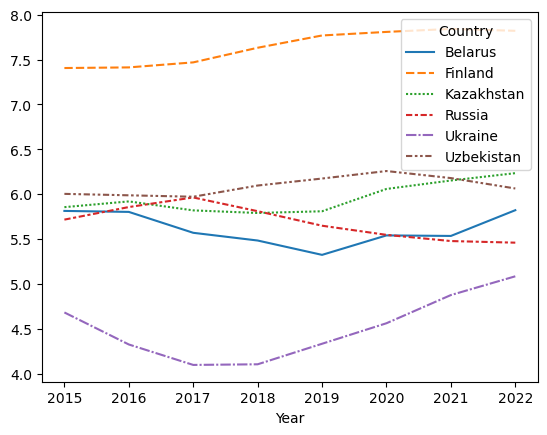

In [45]:
sns.lineplot(data=pivot_short)
plt.show()
# sns.lineplot(data = short, x = 'Year', y = 'Happiness Score', hue = 'Country')

### 7. Happiness Score map 2022

In [46]:
df22 = df[df['Year']==2022]
df22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        147 non-null    object 
 1   Happiness Rank                 147 non-null    int64  
 2   Happiness Score                146 non-null    float32
 3   Economy (GDP per Capita)       146 non-null    float32
 4   Social support                 146 non-null    float32
 5   Health (Life Expectancy)       146 non-null    float32
 6   Freedom                        146 non-null    float32
 7   Trust (Government Corruption)  146 non-null    float32
 8   Generosity                     146 non-null    float32
 9   Year                           147 non-null    int64  
dtypes: float32(7), int64(2), object(1)
memory usage: 8.6+ KB


In [47]:
fig = px.choropleth(data_frame = df22,
                    locations= 'Country',
                    locationmode='country names',
                    color= 'Happiness Score',
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',
                    width=1200,
                    height=600,)
fig.show()

In [48]:
fig = px.choropleth(data_frame = df22,
                    locations= 'Country',
                    locationmode='country names',
                    color= 'Economy (GDP per Capita)',
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',
                    width=1200,
                    height=600,)
fig.show()

In [49]:
fig = px.choropleth(data_frame = df22,
                    locations= 'Country',
                    locationmode='country names',
                    color= 'Social support',
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',
                    width=1200,
                    height=600,)
fig.show()

In [50]:
fig = px.choropleth(data_frame = df22,
                    locations= 'Country',
                    locationmode='country names',
                    color= 'Health (Life Expectancy)',
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',
                    width=1200,
                    height=600,)
fig.show()

In [51]:
fig = px.choropleth(data_frame = df22,
                    locations= 'Country',
                    locationmode='country names',
                    color= 'Freedom',
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',
                    width=1200,
                    height=600,)
fig.show()

In [52]:
fig = px.choropleth(data_frame = df22,
                    locations= 'Country',
                    locationmode='country names',
                    color= 'Trust (Government Corruption)',
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',
                    width=1200,
                    height=600,)
fig.show()

In [53]:
fig = px.choropleth(data_frame = df22,
                    locations= 'Country',
                    locationmode='country names',
                    color= 'Generosity',
                    hover_name= "Country",
                    color_continuous_scale= 'RdYlGn',
                    width=1200,
                    height=600,)
fig.show()

### 8. AVG dynamic

In [54]:
grouped = df.groupby('Year')[['Happiness Rank',
    'Happiness Score', 
    'Economy (GDP per Capita)',
    'Social support', 
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity']].mean()

grouped2 = grouped.reset_index()
grouped2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           8 non-null      int64  
 1   Happiness Rank                 8 non-null      float64
 2   Happiness Score                8 non-null      float32
 3   Economy (GDP per Capita)       8 non-null      float32
 4   Social support                 8 non-null      float32
 5   Health (Life Expectancy)       8 non-null      float32
 6   Freedom                        8 non-null      float32
 7   Trust (Government Corruption)  8 non-null      float32
 8   Generosity                     8 non-null      float32
dtypes: float32(7), float64(1), int64(1)
memory usage: 480.0 bytes


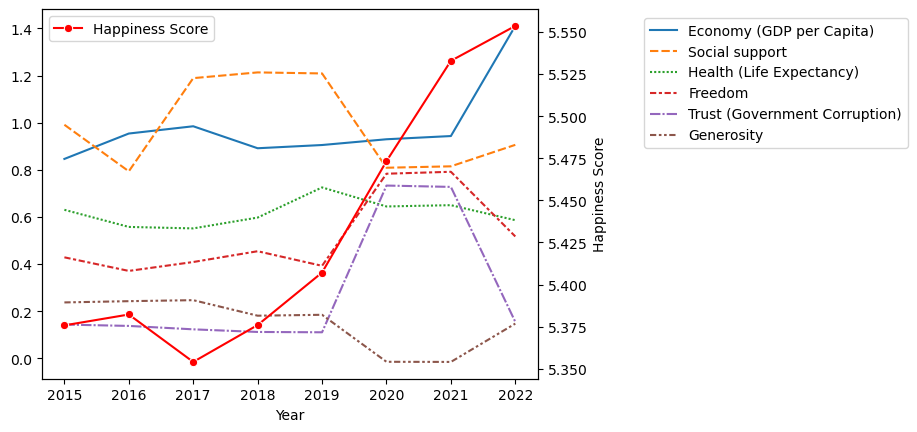

In [55]:
grouped_s = grouped.drop(['Happiness Rank', 'Happiness Score'], axis=1) 

g = sns.lineplot(data=grouped_s)
g1 = sns.lineplot(x = grouped2['Year'], y = grouped2['Happiness Score'], marker = 'o', color = 'red', ax=g.axes.twinx(), label='Happiness Score')

g.legend(loc='center left', bbox_to_anchor=(1.2, 0.8))

plt.show()


### 8. Correlation


In [56]:
df_corr = df.drop('Happiness Rank', axis=1)

mask = np.zeros_like(df_corr.corr())
triangle = np.triu_indices_from(mask)
mask[triangle] = True

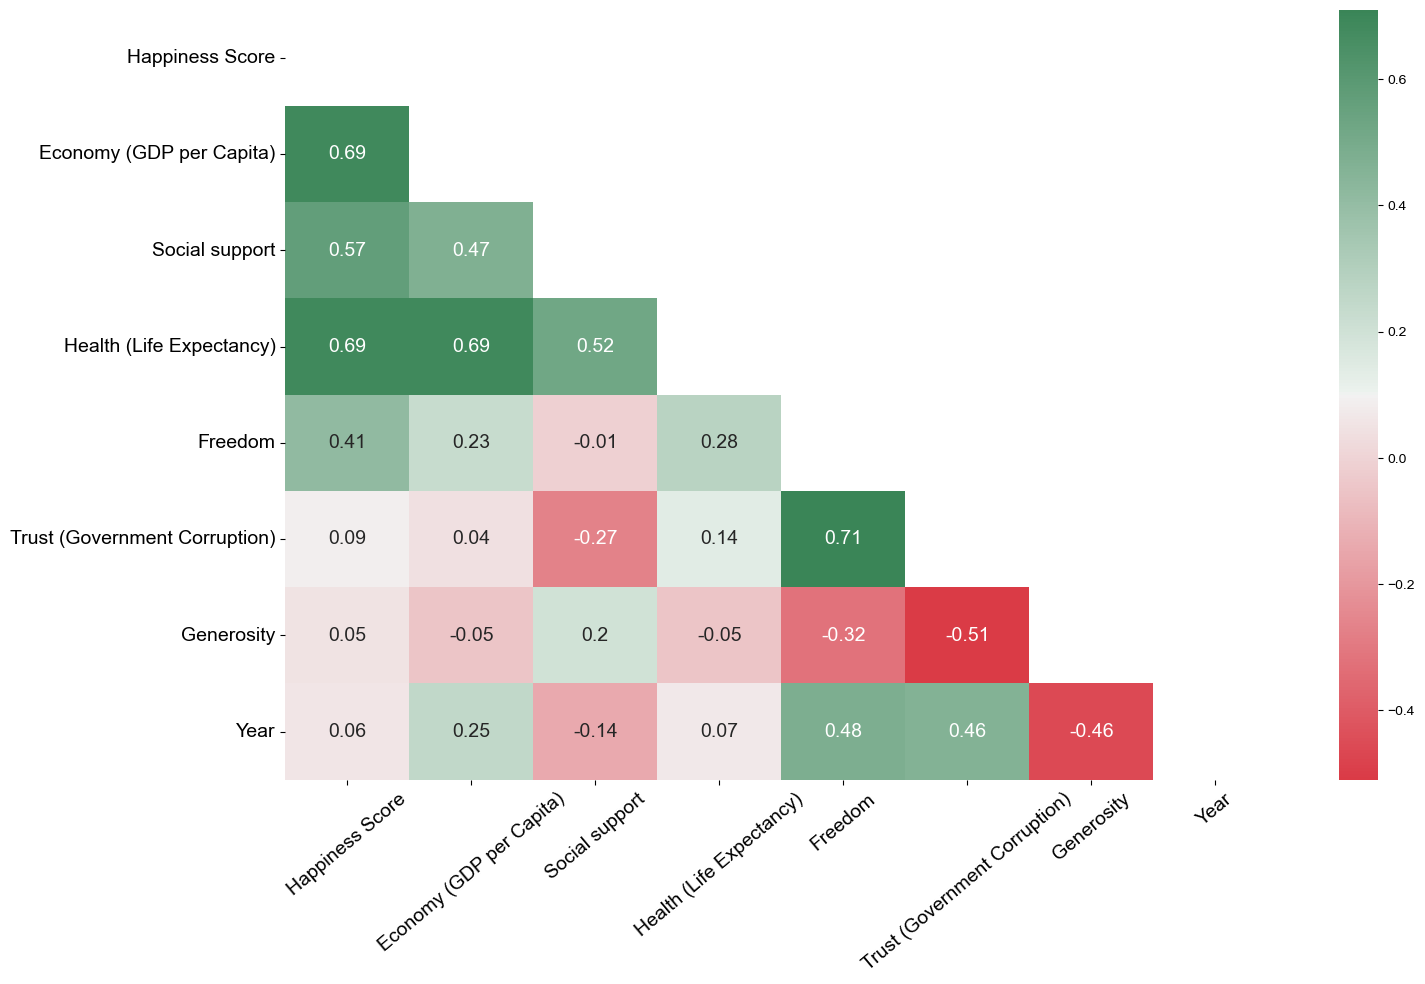

In [57]:
# Colors
cmap = sns.diverging_palette(10, 500, as_cmap=True)

plt.figure(figsize=(16, 10))
sns.heatmap(df_corr.corr().round(2), mask = mask, cmap=cmap, annot= True, annot_kws={'size':14})
sns.set_style('white')
plt.xticks(fontsize = 14, rotation = 40)
plt.yticks(fontsize = 14);

Есть очень тесная прямая связь между ВВП на душу населения, продолжительностью жизни и уровнем счастья, а также сильная связь прямая связь уровня счастья и уровня свободы, и наличия людей которые могут помочь в трудной ситуации.  
Еще интересное наблюдение: есть сильная обратная взаимосвязь между уровнем доверия к государству и уровнем щедрости (волонтерские проекты, пожертвования)

### 8. Bubble chart

In [58]:
colors_dict  = {'Russia' : 'red', 'Belarus':'green', 'Ukraine':'yellow', 'Kazakhstan':'blue', 'Uzbekistan': 'turquoise', 'Finland':'purple'}
fig = px.scatter(short.query("Year==2022"), x="Health (Life Expectancy)", y="Happiness Score",
	    size="Economy (GDP per Capita)",
      color_discrete_map = colors_dict,
      color="Country",
      hover_name="Country", log_x=True, size_max=60)

fig.show()



In [59]:
colors  = ['purple','turquoise','blue','green', 'red', 'yellow']
colors_dict  = {'Russia' : 'red', 'Belarus':'green', 'Ukraine':'yellow', 'Kazakhstan':'blue', 'Uzbekistan': 'turquoise', 'Finland':'purple'}

px.scatter(short, x = 'Health (Life Expectancy)', y = 'Happiness Score', size = 'Economy (GDP per Capita)' , hover_name = 'Country', 
       color= 'Country',
       # color_discrete_sequence=colors,
       color_discrete_map = colors_dict,
       animation_frame = 'Year', size_max = 80, title = 'Happiness Score VS Health',
       range_x = [0.5, 1],
       range_y = [4, 9]
       )

как расчитывается общая оценка счастья во Всемирном докладе о счастье?  
Общая оценка счастья в ежегодном Всемирном докладе о счастье (World Happiness Report) рассчитывается на основе ответов на опрос, который проводится в разных странах. В опросе используется шкала от 0 до 10, где 0 означает наихудшее возможное состояние, а 10 - наилучшее возможное состояние.

Респондентам задается вопрос: "Подумайте обо всех аспектах своей жизни - социальной, эмоциональной, физической. Если бы вы могли дать свою оценку своей жизни на шкале от 0 до 10, где 0 - самая плохая возможная жизнь, а 10 - самая лучшая возможная жизнь, какую бы оценку вы дали своей жизни?"

Общая оценка счастья в стране рассчитывается как среднее арифметическое всех ответов на этот вопрос. Далее, на основе общей оценки счастья страны составляется рейтинг счастливых стран.